# Algoritmos supervisionados para classificação

# 

# 1. Introdução ao problema

Este documento tem como objetivo avaliar um conjunto de resultados de exames médicos utilizados no diagnóstico do câncer de Mama. Para aplicar recursos computacionais para previsão do tipo de câncer utilizando os valores obtidos com cada exame.

Um dos grandes desafios é classificar um tumor como sendo maligno ou benigno. A motivação para realização deste trabalho é avaliar através de modelagem computacional e algoritmos de machine learning a determinação da forma do tumor.


# 2 Ambiente de Análise

Para realização dos tratamento dos dados será utilizado a distribuição Anaconda que disponibiliza integração com diversos 
toolboxes e aplicações python (Igual , et al., 2017). Esses quites são importantes para dar mais praticidade ao desenvolvimento. 
A ferramenta JupyterLab dentro da distribuição Anaconda será utilizada para desenvolvimento dos códigos e plotagem de gráficos e 
tabelas que serão apresentadas durante as analises 

# 3. Base de Dados

Para esse tarefa foram coletados um conjunto de dados disponibilizados no site Kaggle com a descrição abaixo:
URL: https://www.kaggle.com/yasserh/breast-cancer-dataset
“Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.
The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset”. (M Yasser H, 2021)
O site também qualifica a usabilidade do dataset como 10, alto nível de aplicação pratica.

	A base de dados contém 569 resultados de exames de 32 exames com seus respectivos diagnósticos, informando se o tumor é do tipo B – Benigno ou do tipo M - Maligno



# 4. Import de Dados

Import dos dados CSV utilizando a biblioteca Pandas e visualização do cabeçalho

In [23]:
import pandas as pd
dataSet = pd.read_csv("C:\\Users\\Erik\\Documents\\Jupiter\\POS\\archive_cancer_Detection\\breast-cancer.csv")
dataSet.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Remoção da coluna ID porque não é necessário para a modelagem porque está somente como um código identificador da linha.

In [24]:
dataSet2 =dataSet.drop(columns=["id"])
dataSet2.head()
target = dataSet ['diagnosis'].values

Todas as variáveis de entrada são do tipo Float64, dessa forma, a priori, não há necessidade de conversão de tipos. A variável alvo é do tipo object. A formatação é do tipo decimal para todas as colunas contendo os exames, ou seja, não a data ou formatos numéricos que possam causar alguma distorção de interpretação por conta do formato ao modelo.
Valores Continuos Float64

Váriável alvo é tipo Objecto, categórica, "M" - Cancer Maligno e "B" - Cancer Benigno

In [25]:
dataSet2.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

# Balanceamento dos dados

O gráfico abaixo está mostrando as quantidades percentuais de cada tipo de câncer dentro do dataset. Ou seja, as ocorrências de resultados benignos e maligonos dos tumores dos exames do dataset. A quantidade B corresponde a 62,74% e a quantidade M a 37,26%. Caso houvesse desbalanceamento, seria necessário, pensar em coletar mais dados. Ou caso não fosse possíve, aplicar algum metodode ajuste. Undersampling, Esse método consiste em reduzir o número de observações da classe majoritária para diminuir a diferença entre as categorias. O Oversampling consiste em criar sinteticamente novas observações da classe minoritária, com o objetivo de igualar a proporção das categoria. Tambem a validação cruzada e pode ajudar, dependendo de como esta o desbalanceamento.

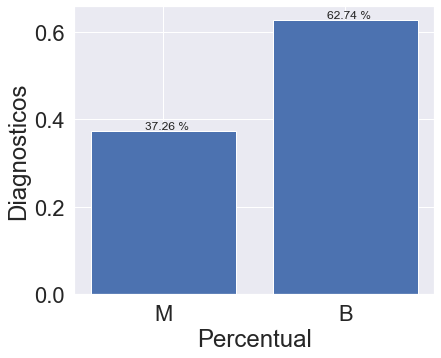

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure( figsize =(5,4))
ax = fig.add_axes([0,0,1,1])
types= ['M', 'B']
percent=[pd.DataFrame(target).value_counts(normalize=True)['M'],pd.DataFrame(target).value_counts(normalize=True)['B']]
ax.bar(types,percent)
ax.set_ylabel('Diagnosticos')
ax.set_xlabel('Percentual')
for index, value in enumerate(percent):
        txt= f'{round(value*100, 2)} %'
        y_coord = value + 0.005
        x_coord=index - 0.1
        ax.text(x=x_coord,y=y_coord, s=txt, fontsize=12)
        ax.grid()
        
plt.show()

# 5. Etapas Modelo de Classificação

5.1 - Coleta de dados informações para sobre o tema. Por exemplo neste caso específico foi verificado no site Kaggle datasets
para classificação na área da saúde, e foi encontrado este dataset https://www.kaggle.com/yasserh/breast-cancer-dataset. Mas em 
um caso de não haver o dataset pronto, deveria ser procurado em base de dados de hospitais por exemplo, os exames utilizados no diagnostico para elaboração do conjunto de informações para aplicar as tecnicas de machine learning.

5.2 - Transformação dessas informações em variáveis, preparação dos dados.
Etapa de verficação das váriáveis, tipo da informação (float, int, categória), verificação de balanceamento dos cados, de escala das váriáveis, outliers, dados faltantes.

5.3 - Verificação e tratamento da qualidade dos dados. 
Ajustes que forem necessários para os dados, por exemplo, neste caso foi utilizado o StandardScale para normalizar variáveis,
e também realizado a matriz de correlação para eliminação de dados altamente correlacionados por se considerar como uma informação dublicada, mesmo informação, em duas váriáveis diferentes.

5.4 - Escolha de algoritmos que se aplicam so tipo de modelagem.
Neste modelo, serão utilizados algumas váriações dos algoritmos de regressão logistica, arvore de decisão com diversas profundidades, e Support Vector Machine com váriação do kernel.


5.5 - Treinamento.
Treinamento dos modelos, neste caso, os modelos serão treinados com uma amostra utilizando um SEED para evitar aleatoriedade,
por exemplo, executar o algoritmo duas vezes e ter dois resultados diferentes. E depois utilizar a validação cruzada para testar várias possíbilidades com cuzamento de informação.


5.6 - Avaliação.

Avaliação dos resultados, com os principais indicadores, acurácia, sensibilidade, f1-score, matriz de confusão. Estabelecimaneto de uma linha base, com o Dummy Classifier, o mínimo que se pode atingir e comparação entre os modelos.


5.7 - Otimização.

Passo futuro, utilizar algoritmos de seleção de feactures para selecionar as melhores váriáveis para o modelo. 

5.8 - Generalização

Alcansando os resultados esperados na modelagem, partir para implementar o modelo e aplicar na "pratica" e coletar
resultados com a utilização. Neste caso específico, poderia se conseguir diagnosticos mais rápidos em relação ao cancer de mama, ou ter um co-diagnostico com um médico especialista. 


# 6. Verificação dos dados

5.1 Verificação de Dados Nulos co metôdo isnull() com a soma para definir se algumas das features contém celula com dado nulo. No caso nenhuma contém.

In [27]:
dataSet2.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

5.2 Correlação

A verificação da correlação dos dados é feita para identificar se existe alguma coluna fortemente relacionada com outra, 
medir esse grau de relacionamento a fim de reduzir a dimensionalidade do modelo

<AxesSubplot:>

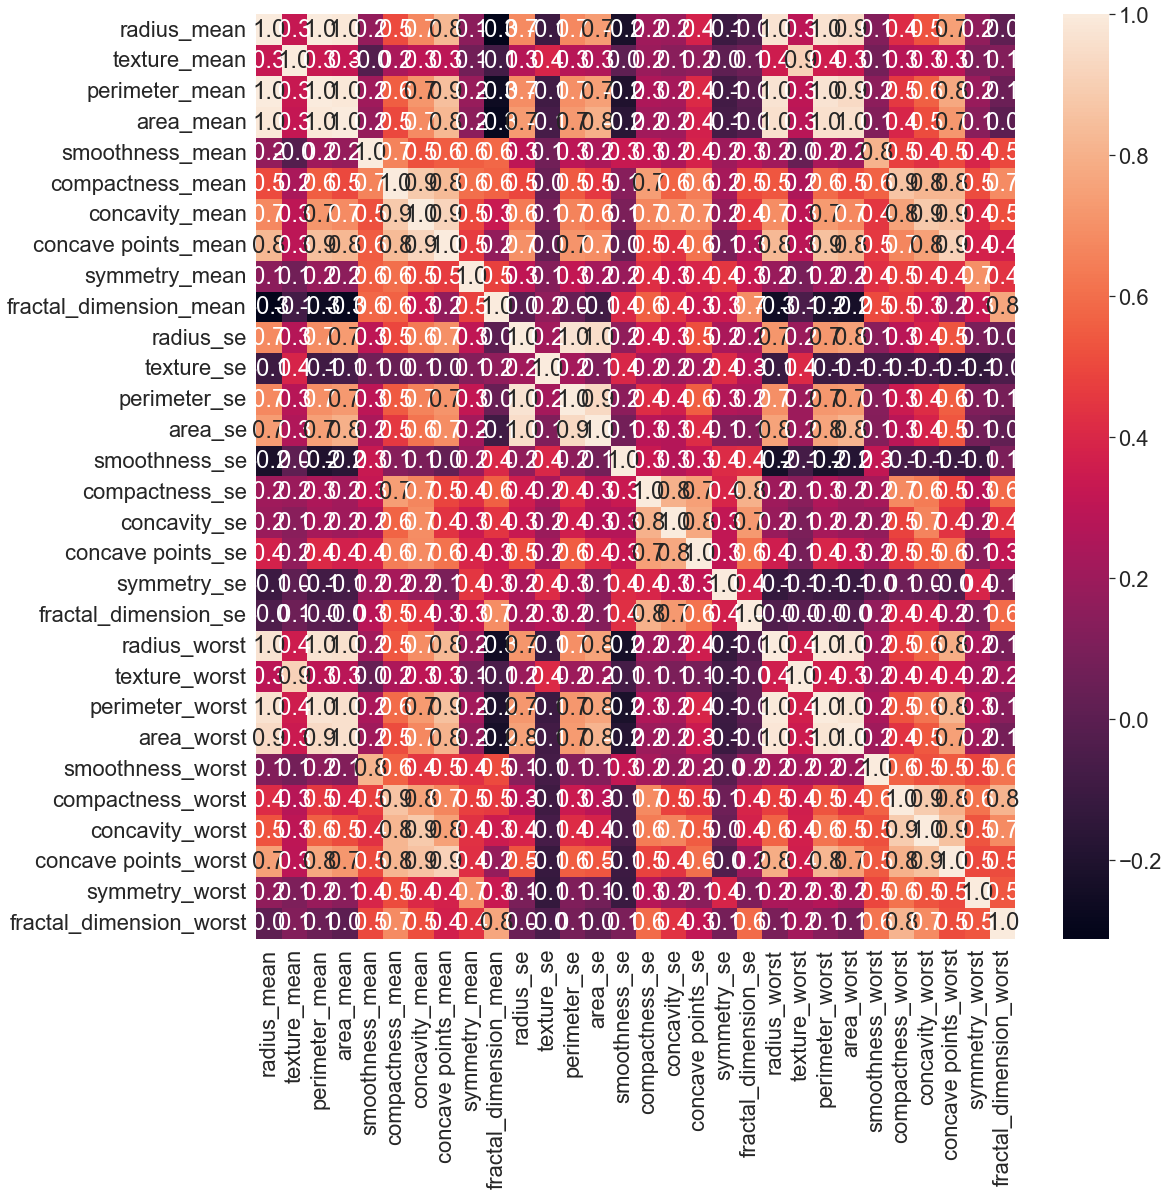

In [28]:

import numpy as np
import seaborn as sns

correlationMatriz= dataSet2.corr()
plt.figure(figsize = (32, 32))

sns.heatmap(correlationMatriz, annot = True, fmt = ".1f")

Coeficientes de Correlação:

ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;

ρ = 0,7 a 09 (positivo ou negativo): correlação forte;

ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;

ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;

ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.


A matriz funciona da seguinte forma, cada coluna do dataset é representada como uma linha e também como uma coluna. Os pontos 
da diagonal principal sempre vão ter correlação máxima de 1, pois se trata do mesmo item, linha e coluna. Em cada coluna é 
comparada a correlação com as demais, em relação as linhas (ou linhas em relação as colunas, tanto faz, é exatamente a mesma 
coisa).

Por exemplo, radius_mean tem correlação muito próxima de 1 (arredondado para 1) com perimeter_mean, area_mean, 
perimeter_worst e area_worst. Isso quer dizer que ambas possuem uma proporcionalidade entre si de forma direta. É como se 
a informação fosse a mesma, só que passada de forma numérica diferente, mas a informação é a mesma, como uma conversão do valor. Dessa forma não há necessidade de manter essas colunas.

In [29]:
correlationMatriz2 = correlationMatriz[correlationMatriz>0.99]
correlationMatriz2  = correlationMatriz2 .sum()
correlationMax = correlationMatriz2[correlationMatriz2>1]
correlationMax

radius_mean        1.997855
perimeter_mean     1.997855
radius_worst       1.993708
perimeter_worst    1.993708
dtype: float64

In [30]:
dataSet3=dataSet2.drop(columns=["perimeter_mean","radius_worst","perimeter_worst"])
dataSet3.head()

,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 7. StarndardScale

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
dataSet4 = dataSet3.drop('diagnosis', axis=1)
standardScaler = StandardScaler()
dataSet5=standardScaler.fit(dataSet4)
dataSet5 = standardScaler.transform(dataSet4)
dataSet5 = pd.DataFrame(data =dataSet5, columns = dataSet4.keys())
dataSet5.head()

,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Outliears

Para a identificação de possíveis outliers, pode ser verificado atráves do grafico boxplot.Porém existe uma quantidade grande de dados que na teória seriam considerados ou poderiam ser considerados outliers, por estarem fora do box do gráfico. 

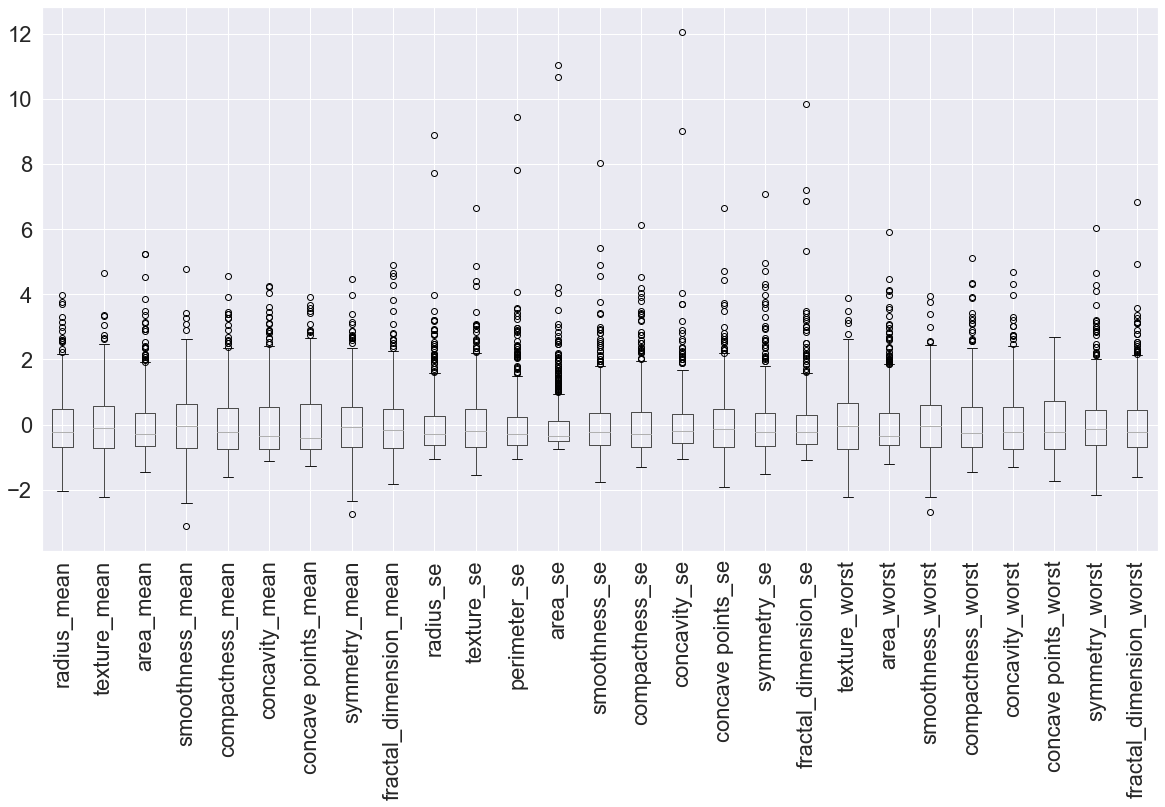

In [32]:
fig = plt.figure(figsize =(20, 10))
# Creating plot
dataSet5.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

# 8. DummyClassifier

O DummyClassifier faz previsões que ignoram os recursos de entrada. Esse classificador serve como uma linha de base simples 
para comparação com outros classificadores mais complexos. Então, o primeiro algoritmo a ser aplicado será o DummyClassifier da biblioteca SKlearn. Dessa forma o objetivo é estabelecer os parâmetros mínimos de resultados, para na sequência poder comparar aos demais algoritmos de classificação.


In [33]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
SEED = 10
train_x, test_x, train_y, test_y = train_test_split(dataSet5, target, random_state=SEED)
dummy = DummyClassifier(strategy= "most_frequent")
dummy.fit(train_x, train_y)
dummypredict = dummy.predict(test_x)
print("Resultado da classificação boba %.2f%%" % (dummy.score(test_x, test_y)* 100))

Resultado da classificação boba 63.64%


In [34]:
dummypredict

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
      dtype='<U1')

O algoritmo obteve uma taxa de acerto de 63,64% com a estratégia de “most_frequent” mais frequente. Basicamente ele verificou 
que o caso mais frequente é o de câncer é o tipo “B”, e assim descreveu todos os casos como sendo do Tipo “B”. Como esse tipo 
corresponde a aproximadamente a cerca de 60% dos casos, e nos dados de teste os tipo “B” são exatamente a taxa de acerto do 
Dummy em percentual de número de ocorrência em relação ao tipo ”M”.

In [97]:
data_label_map = dataSet[['diagnosis']].drop_duplicates()
data_label_map

,diagnosis
0,M
19,B


In [126]:
troca = {
    'M' : 1,
    'B' : 0
}

model_wine = DummyClassifier(strategy= "most_frequent")

data_label_map['tipo'] = data_label_map.diagnosis.map(troca)
data_label_map


data= pd.concat ([dataSet [['diagnosis']], dataSet5])
data ['tipo']= data.diagnosis.map(troca)
data_label_map.tipo.unique()

df_train['probability'] = model_wine.predict_proba(xtrain)[:,1]
df_test['probability']  = model_wine.predict_proba(xtest)[:,1]

df_wine = pandas.concat((df_train, df_test), axis=0)


,diagnosis,tipo
0,M,1
19,B,0


In [127]:
def print_results_cross_validation(results, modelname):
    media = results['test_score'].mean()
    print("================",modelname,"=====================")
    print("Accuracy médio: %.1f" % (media * 100))
    print ("Intervalo padrão [%.1f , %.1f]" % ((results['test_score'].min()) *100, (results['test_score'].max())*100))

In [128]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
import sklearn.linear_model as lm
cv = StratifiedKFold(n_splits = 10, shuffle = True)

model_map = {
    'default': DummyClassifier(strategy= "most_frequent"),
}

Y = target
X = dataSet5

SEED = 10

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, random_state=SEED)


df_train = xtrain.copy()
df_test = xtest.copy()
resultsdf = pd.DataFrame([1,2,3,4,5,6,7,8,9,10], columns = ['ID'])

for modelname, model in model_map.items():
    
    model_map[modelname] = model
    results=cross_validate(model, X, Y, cv=cv, return_train_score=False)
    print_results_cross_validation(results, modelname)
    resultsdf = pd.concat([resultsdf, pd.DataFrame(results['test_score'],columns = [modelname])], axis = 1)

================ default =====================
Accuracy médio: 62.7
Intervalo padrão [61.4 , 63.2]


In [151]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
import sklearn.linear_model as lm
from sklearn.metrics import RocCurveDisplay
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 10, shuffle = True)

model_map = {
    'default': DummyClassifier(strategy= "most_frequent")
}

Y = target
X = dataSet5

SEED = 10

#xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, random_state=SEED)
classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)
random_state = np.random.RandomState(0)

n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


df_train = xtrain.copy()
df_test = xtest.copy()
resultsdf = pd.DataFrame([1,2,3,4,5,6,7,8,9,10], columns = ['ID'])

for i, (train, test) in enumerate(cv.split(X, Y)):
    classifier.fit(X[train], Y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

AttributeError: type object 'RocCurveDisplay' has no attribute 'from_estimator'

In [170]:
tipo = pd.DataFrame(target, columns = ['tipo'])

In [171]:
troca = {
    'M' : 1,
    'B' : 0
}
dataSet6=dataSet5
dataSet6['tipo'] = tipo.tipo.map(troca)

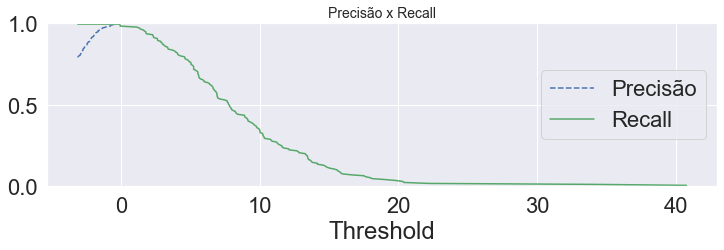

In [172]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression

np.random.seed(SEED)

y = dataSet5['tipo']
X = dataSet5

cv = StratifiedKFold(n_splits = 5, shuffle = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y)

model = LogisticRegression(solver='liblinear')
y_scores = cross_val_predict(model, X_train, y_train, cv = cv, method = 'decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (12,3))

plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.ylim([0,1])
plt.title('Precisão x Recall', fontsize = 14)

plt.show()

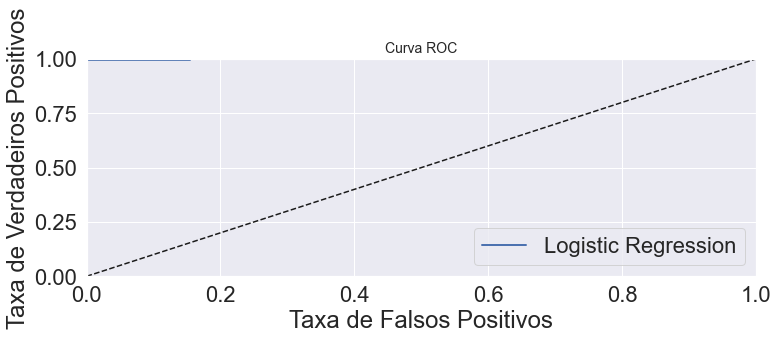

In [173]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (12,4))

plt.plot(fpr, tpr, linewidth=2, label = 'Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)

plt.show()

In [152]:
plt.figure(figsize=(6,4))

fpr, tpr, thr = metrics.roc_curve(df_wine[wine_target_col],
                                  df_wine['probability'])
plt.plot(fpr, tpr, '-', lw=2, label='Regressão Logística')

plt.legend(loc='right')
plt.title('Classificador Vinhos de Alta Qualidade')
plt.grid()
plt.xlabel('Taxa de Falso Alarme')
plt.ylabel('Taxa de Detecção')

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# 9. Regressão logística

A regressão logística é um tipo de modelo de classificação estatística probabilística. Isto é usado como um modelo binário 
para prever uma resposta binária, o resultado de uma variável dependente (ou seja, o rótulo da classe), com base em uma ou 
mais variáveis (Igual , et al., 2017). A regressão logistica é um tipo de modelagem estátisca aplicada para classificação, ou seja aplicada para determinação de variáveis categóricas, que podem ser binárias ou não, porém categóricas, não continuas.
Diferente por exemplo da  regressão linear, que cria uma equação que melhor determina a relação entre váriáveis preditoras que são as utilizadas como variáveis entrada e a variável alvo.

In [35]:
from sklearn import preprocessing, model_selection, metrics
import random
import sklearn.linear_model as lm
model_map = {
    'default': lm.LogisticRegression(),
    'log_l1': lm.LogisticRegression(penalty='l1', solver='liblinear', C=1.0),
    'log_l2': lm.LogisticRegression(penalty='l2', solver='liblinear', C=1.0),
    'log_el': lm.LogisticRegression(penalty='elasticnet',l1_ratio= 0.4, solver='saga', C=1.0),
}

Y = target
X = dataSet5

SEED = 10

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, random_state=SEED)

print ("Test/total", len(xtest)/(len(xtest)+len(xtrain)))


df_train = xtrain.copy()
df_test = xtest.copy()

for modelname, model in model_map.items():
    model.fit(xtrain, ytrain)      
    yhat_train = model.predict(xtrain)
    yhat_test  = model.predict(xtest)
    # Output table
    df_train[modelname] = yhat_train
    df_test[modelname] = yhat_test
    model_map[modelname] = model
    print (modelname,metrics.classification_report (df_test[modelname], ytest))
df = pd.concat((df_train, df_test), axis=0)


Test/total 0.2513181019332162
default               precision    recall  f1-score   support

           B       0.97      0.98      0.97        90
           M       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

log_l1               precision    recall  f1-score   support

           B       0.96      0.98      0.97        89
           M       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143

log_l2               precision    recall  f1-score   support

           B       0.96      0.98      0.97        89
           M       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.9

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Foram testados 4 variações de algoritmos de regressão logistica. 

Default: Padrão sem nenhum parâmetro
log_l1: Penaulty =l1
log_l2: Penaulty =l2, Default
log_el: penalty=elasticnet, ambos l1 e l2

Os resultados foram muito proximos, em relação a acurária, o log_el teve o melhor resultado com 97%, enquanto log_l2 e o log_l1 teve 96% e o default 97%


[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

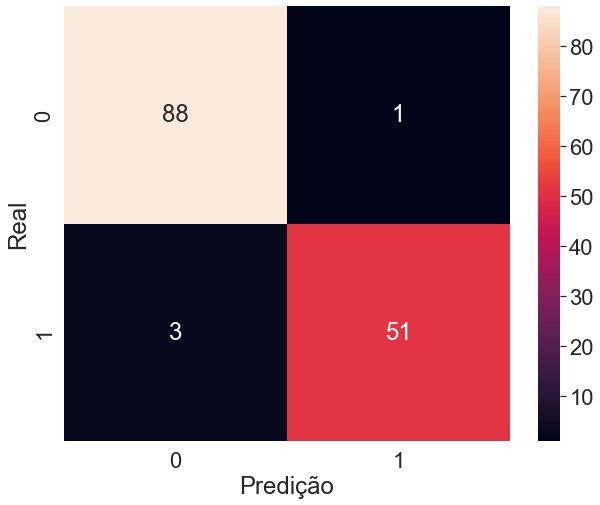

In [36]:
matriz = metrics.confusion_matrix(df_test['log_el'], ytest)
plt.figure(figsize =(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz, annot = True, fmt = "d").set(xlabel = "Predição", ylabel="Real")

Para a aplicação da regressão logística acima, existem 89 casos de tumor “B”, e desses o algoritmo previu 
corretamente 88. Da mesma forma, existem 54 de tumor tipo “M”, e o algoritmo previu corretamente 51. O algoritmo achou que 3 
eram do tipo “B”, mas na verdade eles eram do tipo “M”. E 1 ele pensou que era do tipo “M” e eram do tipo “B”.

Precisão: B: 97% e M: 98%, dos 91 casos que o modelo previu como tipo B, 88 estavam corretos e 3 errados, 88 Certos /91 Total. Para o tipo M, 51 correamente e errou em 1, 51 certos /52 total

Acurácia: Já na acurácia, 97% é o total de previsões corretas (88+51)/ total (88+51+3+1)

Sensibilidade/Recall: Tipo B, 88 acertos, 1 erros de um total de 89. Para o M, 51 acertos e 2 erros de um total de 54 casos reais.

F1-Score, calculo que leva em conta a precisão e a sensibilidade.  B: 98% e M 96%. O dobro da soma de ambos, didivido pela multiplicação



## Curva de validação Cruzada

O SEED utilizado na regressão logistica, fornece um número aleatório fixo para a modelagem, porém ser for realizado a mudança no valor, de 10 para outro valor, os resultados podem ser diferentes. Por isso o processo de validação cruxada é muito importante no processo de validação dos modelos. 

Será utilizado a biblioteca cross_validate do sklearn para realizar quebrar os dados em partes, e realizar treino e testes com 
partes diferentes, para que possa ser comparado os resultados. O parâmtro cv é o número de partes que será dividido o o modelo
durante a validação cruzada. Por padrão o cv possui StratifiedKFOLD = 10 com shuffle True para que haja aleatóriedade na vivisão em partes. E a validação cruzada com StratifiedKFOLD para que os folds preservem a proporcionalidade entre tipos M e B.

Esta função imprime a média das acurácias e o intervalo de desvio padrão.

In [38]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
import sklearn.linear_model as lm
cv = StratifiedKFold(n_splits = 10, shuffle = True)

model_map = {
    'default': lm.LogisticRegression(),
    'log_l1': lm.LogisticRegression(penalty='l1', solver='liblinear', C=1.0),
    'log_l2': lm.LogisticRegression(penalty='l2', solver='liblinear', C=1.0),
    'log_el': lm.LogisticRegression(penalty='elasticnet',l1_ratio= 0.4, solver='saga', C=1.0),
}

Y = target
X = dataSet5

SEED = 10

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, random_state=SEED)


df_train = xtrain.copy()
df_test = xtest.copy()
resultsdf = pd.DataFrame([1,2,3,4,5,6,7,8,9,10], columns = ['ID'])

for modelname, model in model_map.items():
    
    model_map[modelname] = model
    results=cross_validate(model, X, Y, cv=cv, return_train_score=False)
    print_results_cross_validation(results, modelname)
    resultsdf = pd.concat([resultsdf, pd.DataFrame(results['test_score'],columns = [modelname])], axis = 1)


================ default =====================
Accuracy médio: 97.9
Intervalo padrão [92.9 , 100.0]
================ log_l1 =====================
Accuracy médio: 97.2
Intervalo padrão [93.0 , 100.0]
================ log_l2 =====================
Accuracy médio: 97.9
Intervalo padrão [94.7 , 100.0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

================ log_el =====================
Accuracy médio: 97.4
Intervalo padrão [94.7 , 100.0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


================ default =====================
Accuracy médio: 97.7
Intervalo padrão [94.7 , 100.0]


================ log_l1 =====================
Accuracy médio: 97.5
Intervalo padrão [93.0 , 100.0]


================ log_l2 =====================
Accuracy médio: 97.9
Intervalo padrão [94.7 , 100.0]


================ log_el =====================
Accuracy médio: 97.7
Intervalo padrão [93.0 , 100.0]

Com a validação cruzada os resultados ficaram bem próximos de acurácia em todos os modelos, e também muito proximos nos intervalor.

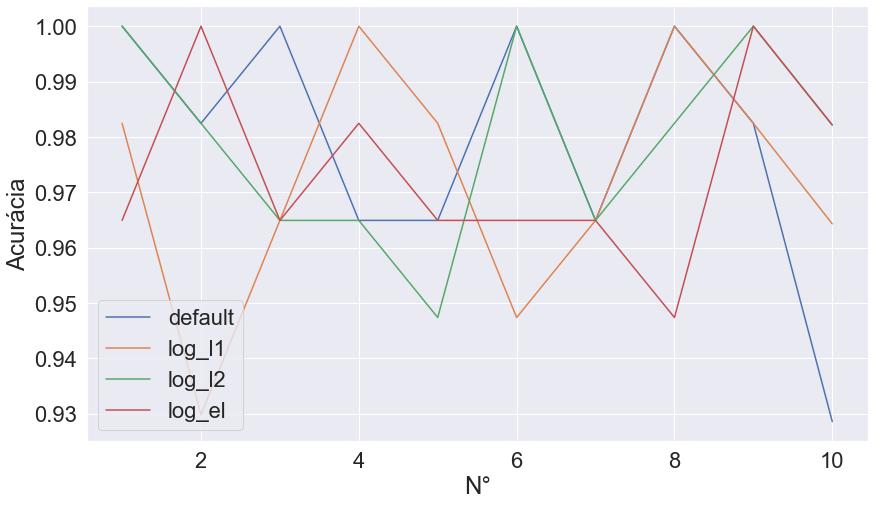

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("N°")
plt.ylabel("Acurácia")

plt.plot(resultsdf['ID'], resultsdf ['default'], label ='default')
plt.plot(resultsdf['ID'], resultsdf ['log_l1'], label ='log_l1')
plt.plot(resultsdf['ID'], resultsdf ['log_l2'], label = 'log_l2')
plt.plot(resultsdf['ID'], resultsdf ['log_el'], label ='log_el')
plt.legend() 
plt.show()

In [40]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 10, shuffle = True)

model_map = {
    'default': lm.LogisticRegression(),
    'log_l1': lm.LogisticRegression(penalty='l1', solver='liblinear', C=1.0),
    'log_l2': lm.LogisticRegression(penalty='l2', solver='liblinear', C=1.0),
    'log_el': lm.LogisticRegression(penalty='elasticnet',l1_ratio= 0.4, solver='saga', C=1.0),
}

Y = target
X = dataSet5

SEED = 10

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, random_state=SEED)


df_train = xtrain.copy()
df_test = xtest.copy()

for modelname, model in model_map.items():
    
    model_map[modelname] = model
    results=cross_validate(model, X, Y, cv=cv, return_train_score=False)
    print_results_cross_validation(results, modelname)



================ default =====================
Accuracy médio: 97.7
Intervalo padrão [94.7 , 100.0]
================ log_l1 =====================
Accuracy médio: 97.2
Intervalo padrão [93.0 , 100.0]
================ log_l2 =====================
Accuracy médio: 97.9
Intervalo padrão [93.0 , 100.0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

================ log_el =====================
Accuracy médio: 97.7
Intervalo padrão [91.2 , 100.0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


# 10. Arvore de Decisão

Esse modelo cria a estrutura de arvore para realizar através de lógicas condicionais. Para aplicação de uma arvoré de decisão será utilizado o DecisionTreeClassifier do Sklearn. Esse algoritmo possui um parâmetro importante, que e o max_depth (profundidade máxima da arvore. Para a arvore não será utilizado o dataSet5 que foi normalizado com o standard scale, poque a arvoré não perde precisão caso as feature estejam em diferentes escalas de magnitude.

In [41]:
from sklearn import tree
from sklearn.metrics import accuracy_score
SEED = 10
train_x, test_x, train_y, test_y = train_test_split(dataSet4, target, random_state=SEED)


for i in range(1, 10):
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = i)
    model.fit(train_x, train_y)
    predict_y=model.predict(test_x)
    print("Profundidade",i,"Resultado da classificação %.2f%%" % (accuracy_score(predict_y, test_y)* 100))
    print(metrics.classification_report(test_y, predict_y))
      

Profundidade 1 Resultado da classificação 92.31%
              precision    recall  f1-score   support

           B       0.92      0.97      0.94        91
           M       0.94      0.85      0.89        52

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143

Profundidade 2 Resultado da classificação 95.10%
              precision    recall  f1-score   support

           B       1.00      0.92      0.96        91
           M       0.88      1.00      0.94        52

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.96      0.95      0.95       143

Profundidade 3 Resultado da classificação 97.20%
              precision    recall  f1-score   support

           B       0.98      0.98      0.98        91
           M       0.96      0.96      0.96        52

    accuracy                       

Os resultados mostram que a arvoré com tamanho 3 e 4 possuem igual taxa de acerto, e maior taxa que as demais profundidades. 
Mas a precisão de acerto do Tipo “B” é melhor para profundidade 4, e do Tipo “M” para 3.

Profundidade 3 Resultado da classificação 97.20%
              precision    recall  f1-score   support

           B       0.98      0.98      0.98        91
           M       0.96      0.96      0.96        52

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Profundidade 4 Resultado da classificação 97.20%
              precision    recall  f1-score   support

           B       0.99      0.97      0.98        91
           M       0.94      0.98      0.96        52

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143






Uma grande qualidade na arvore de decisão é poder verificar como o algoritmo realizou as escolhas. Nos plots abaixo, estão a 
arvore de tamanho 3 e tamanho 4. Em ambos a primeira separação é feita utilizando o valor do exame (area_worst <= 884.55). A 
maior parte das previsões tipo M estão para (area_worst <= 884.55 falso, ou seja maior que 884.55). Somente 5 casos foram 
preditos como tipo B após satisfazer essa condição.

In [42]:
from sklearn import tree
from sklearn.metrics import accuracy_score
SEED = 10
train_x, test_x, train_y, test_y = train_test_split(dataSet4, target, random_state=SEED)

model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)
model3.fit(train_x, train_y)
predict_y=model3.predict(test_x)

In [43]:
 pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.tree import export_graphviz
import graphviz
features=dataSet4.columns
dot_data =export_graphviz(model3, 
                          filled=True, rounded=True ,feature_names=features ,class_names = ["B" ,"M"])
grafico = graphviz.Source(dot_data)

grafico.format = "png"
grafico.render("./teste")
grafico

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
SEED = 10
train_x, test_x, train_y, test_y = train_test_split(dataSet4, target, random_state=SEED)

model4 = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)
model4.fit(train_x, train_y)
predict_y=model3.predict(test_x)

In [45]:
from sklearn.tree import export_graphviz
import graphviz
features=dataSet4.columns
dot_data =export_graphviz(model4, 
                          filled=True, rounded=True ,feature_names=features ,class_names = ["B" ,"M"])
grafico = graphviz.Source(dot_data)

grafico.format = "png"
grafico.render("./teste")
grafico

NameError: name 'model4' is not defined

# Matriz de Confusão

[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

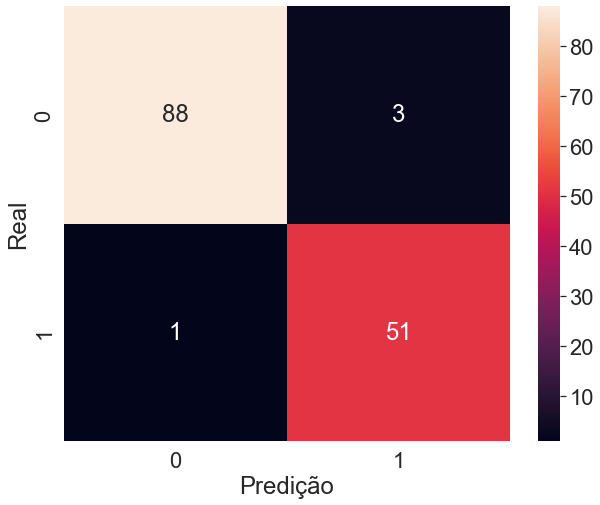

In [46]:

from sklearn import tree
from sklearn.metrics import accuracy_score
SEED = 10

train_x, test_x, train_y, test_y = train_test_split(dataSet4, target, random_state=SEED)

model4 = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)
model4.fit(train_x, train_y)
predict_y=model4.predict(test_x)

from sklearn.metrics import confusion_matrix
matriz_confision = confusion_matrix(test_y,predict_y)
plt.figure(figsize =(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confision, annot = True, fmt = "d").set(xlabel = "Predição", ylabel="Real")

A arvore de decisão com profundidade 4, tem a matriz de confusão em que somente em 1 caso o algoritmo previu como tipo B e na
realidade era tipo M. Que para essa aplicação é o caso mais importante a ser reduzido, porque é um tipo de tumor com gravidade
por ser maligno e seria diagnosticado como benigno. Mas de qualquer forma o resultado está superior ao da regressão.

# Validação Cruzada

Também será utilizada a validação crizada na Arvore de decisão.

================ Profundidade: 1 =====================
Accuracy médio: 89.8
Intervalo padrão [82.5 , 94.7]
================ Profundidade: 2 =====================
Accuracy médio: 92.1
Intervalo padrão [86.0 , 96.5]
================ Profundidade: 3 =====================
Accuracy médio: 95.4
Intervalo padrão [91.2 , 98.2]
================ Profundidade: 4 =====================
Accuracy médio: 93.3
Intervalo padrão [89.3 , 98.2]
================ Profundidade: 5 =====================
Accuracy médio: 94.7
Intervalo padrão [89.5 , 100.0]
================ Profundidade: 6 =====================
Accuracy médio: 94.0
Intervalo padrão [87.7 , 98.2]
================ Profundidade: 7 =====================
Accuracy médio: 94.9
Intervalo padrão [91.2 , 98.2]
================ Profundidade: 8 =====================
Accuracy médio: 93.7
Intervalo padrão [87.7 , 98.2]
================ Profundidade: 9 =====================
Accuracy médio: 92.4
Intervalo padrão [84.2 , 98.2]


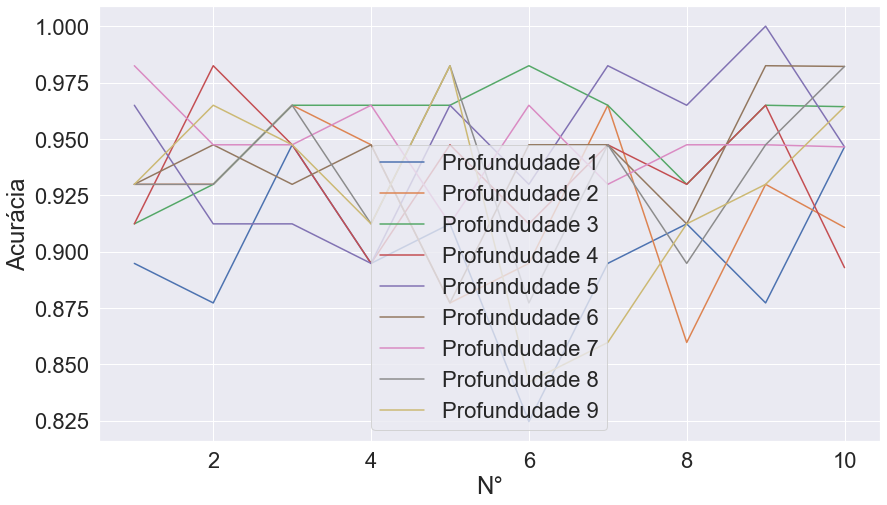

In [47]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 10, shuffle = True)
resultsdf = pd.DataFrame([1,2,3,4,5,6,7,8,9,10], columns = ['ID'])
X = dataSet4
Y = target


import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("N°")
plt.ylabel("Acurácia")


for i in range(1, 10):
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = i)
    results = cross_validate(model, X, Y, cv=cv, return_train_score=False)
    print_results_cross_validation(results, "Profundidade: %d" %(i))
    resultsdf = pd.concat([resultsdf, pd.DataFrame(results['test_score'],columns = [str(i)])], axis = 1)
    plt.plot(resultsdf['ID'], resultsdf [str(i)], label ='Profundudade %d'%i)
plt.legend() 
plt.show()

Desta vez somente a profundidae 4 teve o melhor rendimento, superando as outras.No gráfico abaixo, mostra que houve uma acurácia minima de 93% e máxima de 100% durante o teste de validação cruzada.

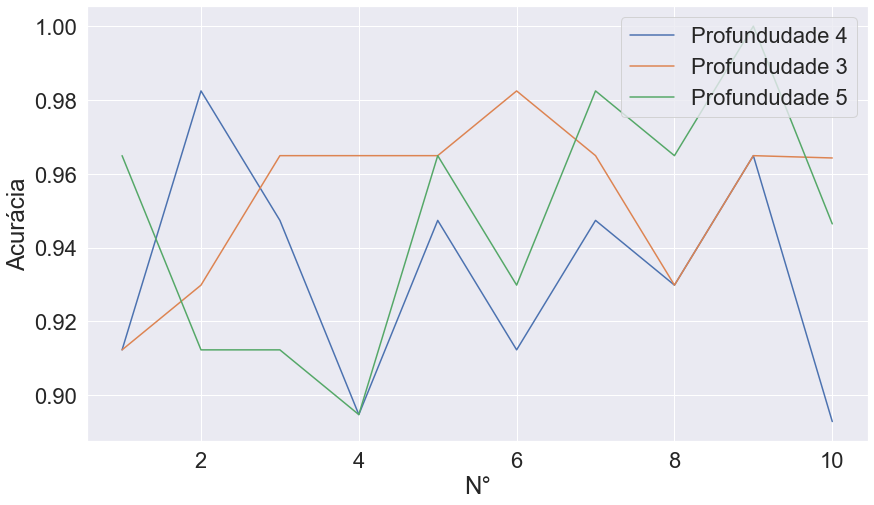

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("N°")
plt.ylabel("Acurácia")
plt.plot(resultsdf['ID'], resultsdf [str(4)], label ='Profundudade %d'%4)
plt.plot(resultsdf['ID'], resultsdf [str(3)], label ='Profundudade %d'%3)
plt.plot(resultsdf['ID'], resultsdf [str(5)], label ='Profundudade %d'%5)
plt.legend() 
plt.show()

In [49]:
def print_results_cross_validation(results, modelname):
    media = results['test_score'].mean()
    maxV= results['test_score'].max()
    minV= results['test_score'].min()
    desvio_padrao = results['test_score'].std()
    print("================",modelname,"=====================")
    print("Accuracy médio: %.1f" % (media * 100))
    print ("Intervalo padrão [%.1f , %.1f]" % ((minV) *100, (maxV)*100))


In [50]:
def roda_arvore_decisão(i, min_samples_leaf):
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = i, min_samples_leaf=min_samples_leaf)
    results = cross_validate(model, X, Y, cv=cv, return_train_score=True)
    #print_results_cross_validation(results, "Profundidade: %d" %(i))
    train_score= results['train_score'].mean()
    test_score = results['test_score'].mean()
    tabela= [i, min_samples_leaf, train_score, test_score]
    return tabela

    



In [51]:
X = dataSet4
Y = target

resultados = []
for i in range(1, 33):
    for m in range (1, 33):
        tabela= roda_arvore_decisão(i, m)
        resultados.append(tabela)
    
resultados=pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', 'train', 'test'])    
resultados.head()

,max_depth,min_samples_leaf,train,test
0,1,1,0.922476,0.887563
1,1,2,0.921695,0.899875
2,1,3,0.922672,0.898152
3,1,4,0.922867,0.894612
4,1,5,0.923063,0.891134


In [52]:
resultados.corr()

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-3.757177e-16,0.188390,0.192527
min_samples_leaf,-3.757177e-16,1.000000e+00,-0.852768,-0.548292
train,1.883902e-01,-8.527678e-01,1.000000,0.723687
test,1.925274e-01,-5.482916e-01,0.723687,1.000000


<AxesSubplot:>

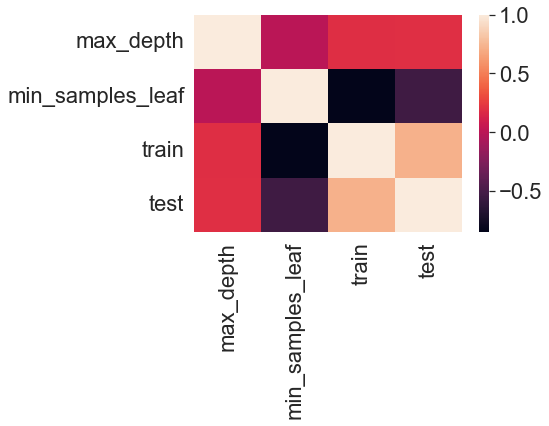

In [53]:
sns.heatmap(resultados.corr())

array([[<AxesSubplot:xlabel='max_depth', ylabel='max_depth'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='max_depth'>,
        <AxesSubplot:xlabel='train', ylabel='max_depth'>,
        <AxesSubplot:xlabel='test', ylabel='max_depth'>],
       [<AxesSubplot:xlabel='max_depth', ylabel='min_samples_leaf'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <AxesSubplot:xlabel='train', ylabel='min_samples_leaf'>,
        <AxesSubplot:xlabel='test', ylabel='min_samples_leaf'>],
       [<AxesSubplot:xlabel='max_depth', ylabel='train'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='train'>,
        <AxesSubplot:xlabel='train', ylabel='train'>,
        <AxesSubplot:xlabel='test', ylabel='train'>],
       [<AxesSubplot:xlabel='max_depth', ylabel='test'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='test'>,
        <AxesSubplot:xlabel='train', ylabel='test'>,
        <AxesSubplot:xlabel='test', ylabel='test'>]], dtype=object)

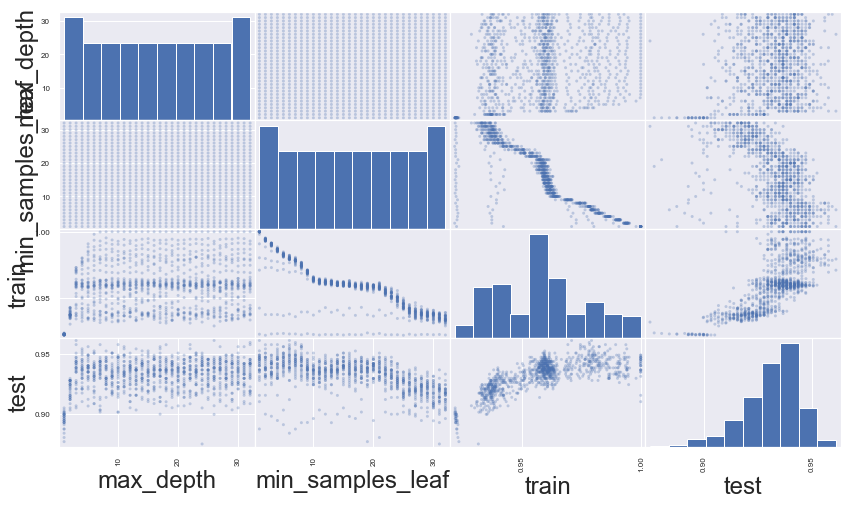

In [54]:
from pandas.plotting import scatter_matrix
scatter_matrix(resultados, figsize = (14, 8), alpha = 0.3)

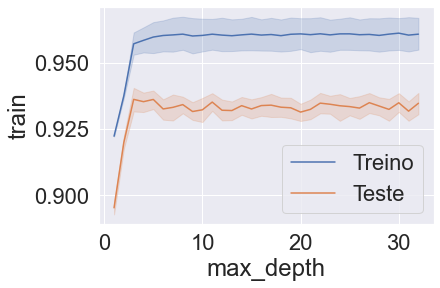

In [55]:
import seaborn as sns

sns.lineplot(x='max_depth', y='train', data=resultados)
sns.lineplot(x='max_depth', y='test', data=resultados)
plt.legend(['Treino','Teste'])

In [56]:
resultados.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,train,test
805,26,6,0.979300,0.961310
64,3,1,0.970906,0.961278
998,32,7,0.978325,0.959555
294,10,7,0.978520,0.957832
999,32,8,0.974615,0.957832


In [57]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
seed=10
np.random.seed(seed)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}
busca = GridSearchCV(tree.DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = StratifiedKFold(n_splits = 10, shuffle = True))

busca.fit(X, Y)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005490,0.000922,0.001614,0.000500,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.947368,...,0.912281,0.912281,0.964912,0.842105,0.912281,0.912281,0.964286,0.928008,0.036274,1
1,0.005198,0.000399,0.001503,0.000498,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.947368,...,0.912281,0.912281,0.964912,0.842105,0.912281,0.912281,0.964286,0.928008,0.036274,1
2,0.006096,0.001310,0.002100,0.000938,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.947368,...,0.912281,0.912281,0.964912,0.842105,0.912281,0.912281,0.964286,0.928008,0.036274,1
3,0.005103,0.000538,0.001496,0.000496,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.929825,...,0.859649,0.859649,0.964912,0.842105,0.877193,0.912281,0.892857,0.894549,0.035092,13
4,0.004998,0.000003,0.001706,0.000460,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.929825,...,0.859649,0.859649,0.964912,0.842105,0.877193,0.912281,0.892857,0.894549,0.035092,13


In [58]:
print (busca.best_score_*100)

92.80075187969923


In [59]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [60]:
    SEED = 10
    train_x, test_x, train_y, test_y = train_test_split(dataSet4, target, random_state=SEED)
    model = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)
    model.fit(train_x, train_y)
    predict_y=model.predict(test_x)
    print("Profundidade",3,"Resultado da classificação %.2f%%" % (accuracy_score(predict_y, test_y)* 100))
    print(metrics.classification_report(test_y, predict_y))
    
    
    model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)
    model2.fit(train_x, train_y)
    predict_y=model.predict(test_x)
    print("Profundidade",4,"Resultado da classificação %.2f%%" % (accuracy_score(predict_y, test_y)* 100))
    print(metrics.classification_report(test_y, predict_y))

Profundidade 3 Resultado da classificação 95.10%
              precision    recall  f1-score   support

           B       1.00      0.92      0.96        91
           M       0.88      1.00      0.94        52

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.96      0.95      0.95       143

Profundidade 4 Resultado da classificação 95.10%
              precision    recall  f1-score   support

           B       1.00      0.92      0.96        91
           M       0.88      1.00      0.94        52

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.96      0.95      0.95       143



In [61]:
from sklearn import tree
from sklearn.metrics import accuracy_score
SEED = 10
train_x, test_x, train_y, test_y = train_test_split(dataSet4, target, random_state=SEED)



model = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)
model.fit(train_x, train_y)
predict_y=model.predict(test_x)
print("Profundidade",i,"Resultado da classificação %.2f%%" % (accuracy_score(predict_y, test_y)* 100))
print(metrics.classification_report(test_y, predict_y))
      

Profundidade 32 Resultado da classificação 95.10%
              precision    recall  f1-score   support

           B       1.00      0.92      0.96        91
           M       0.88      1.00      0.94        52

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.96      0.95      0.95       143



In [62]:
from sklearn import tree
from sklearn.metrics import accuracy_score
SEED = 10
train_x, test_x, train_y, test_y = train_test_split(dataSet4, target, random_state=SEED)



model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)
model.fit(train_x, train_y)
predict_y=model.predict(test_x)
print("Profundidade",i,"Resultado da classificação %.2f%%" % (accuracy_score(predict_y, test_y)* 100))
print(metrics.classification_report(test_y, predict_y))
      

Profundidade 32 Resultado da classificação 97.20%
              precision    recall  f1-score   support

           B       0.99      0.97      0.98        91
           M       0.94      0.98      0.96        52

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [63]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
seed=10
np.random.seed(seed)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}
busca = GridSearchCV(tree.DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = StratifiedKFold(n_splits = 5, shuffle = True))

busca.fit(dataSet4, target)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005407,0.000796,0.001002,0.000003,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.938596,0.947368,0.921053,0.903509,0.938053,0.929716,0.015632,1
1,0.005590,0.000793,0.001609,0.000496,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.938596,0.912281,0.921053,0.903509,0.938053,0.922698,0.013914,5
2,0.004809,0.000737,0.001785,0.000391,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.938596,0.947368,0.921053,0.903509,0.938053,0.929716,0.015632,1
3,0.004599,0.000510,0.001801,0.000401,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.912281,0.885965,0.903509,0.868421,0.938053,0.901646,0.023630,13
4,0.004599,0.000477,0.001607,0.000497,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.912281,0.885965,0.903509,0.868421,0.938053,0.901646,0.023630,13


In [64]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [65]:
X=dataSet4
Y=target

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, X, Y, cv = StratifiedKFold(n_splits=10, shuffle=True))
scores

array([0.85964912, 0.94736842, 0.9122807 , 0.96491228, 0.96491228,
       0.9122807 , 0.92982456, 0.89473684, 0.92982456, 0.98214286])

In [67]:
scores.mean()

0.9297932330827068

# Busca Aleatória

In [68]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
seed=10
np.random.seed(seed)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}
busca = RandomizedSearchCV(tree.DecisionTreeClassifier(),
                    espaco_de_parametros, 
                    n_iter = 16,
                    cv = StratifiedKFold(n_splits = 5),
                          random_state = SEED)

busca.fit(dataSet4, target)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003878,0.000838,0.002001,0.001790,32,128,3,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.877193,0.903509,0.921053,0.903509,0.893805,0.899814,0.014326,5
1,0.004799,0.001595,0.002400,0.001959,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.877193,0.903509,0.921053,0.903509,0.893805,0.899814,0.014326,5
2,0.005911,0.001978,0.001600,0.001497,128,32,3,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.903509,0.929825,0.956140,0.929825,0.938053,0.931470,0.016966,1
3,0.004223,0.000437,0.000799,0.001598,32,64,5,gini,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.877193,0.903509,0.921053,0.903509,0.893805,0.899814,0.014326,5
4,0.003200,0.001600,0.001600,0.001959,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.877193,0.903509,0.921053,0.903509,0.893805,0.899814,0.014326,5


In [69]:
scores = cross_val_score(busca, X, Y, cv = StratifiedKFold(n_splits=10, shuffle=True))
scores.mean()

0.9156015037593985

In [70]:
def imprime_score(score):
    print("Média: %.2f%%" %(score.mean()), "[ %.2f%%" %(score.min()), "- %.2f%%]" %(score.max()))

In [71]:
imprime_score(scores)

Média: 0.92% [ 0.82% - 1.00%]


In [72]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=128)

In [73]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
seed=10
np.random.seed(seed)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros, 
                    n_iter = 16,
                    cv = StratifiedKFold(n_splits = 5),
                          random_state = SEED)

busca.fit(dataSet4, target)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.129516,0.001870,0.011994,0.000002,32,128,3,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.868421,0.964912,0.938596,0.921053,0.938053,0.926207,0.032118,14
1,0.147211,0.001622,0.011188,0.001616,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.885965,0.947368,0.938596,0.938596,0.946903,0.931486,0.023079,13
2,0.173485,0.033986,0.012405,0.001355,128,32,3,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.912281,0.947368,0.964912,0.947368,0.955752,0.945536,0.017846,3
3,0.148657,0.001352,0.011591,0.000496,32,64,5,gini,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.885965,0.929825,0.947368,0.947368,0.973451,0.936796,0.028981,10
4,0.136847,0.002997,0.009594,0.002062,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.850877,0.956140,0.938596,0.929825,0.920354,0.919159,0.036119,16


In [74]:
scores = cross_val_score(busca, X, Y, cv = StratifiedKFold(n_splits=10, shuffle=True))
imprime_score(scores)

Média: 0.94% [ 0.88% - 0.98%]


In [75]:
melhor = busca.best_estimator_
melhor

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=32,
                       min_samples_split=128)

# 11. Support Vector Machine

O Support vector machine é um algoritmo que pode ser utilizado na classificação, regressão, e detecção de valores discrepantes.

In [76]:
from sklearn import preprocessing, model_selection, metrics
import random
from sklearn import svm
model_map = {
        'svc_1': svm.SVC(),
        'svc_2': svm.SVC(kernel='linear', C=0.1, probability=True),
        'svc_3': svm.SVC(kernel='poly', C=0.1, probability=True),
        'svc_4': svm.SVC(kernel='rbf', C=0.1, probability=True),
        'svc_5': svm.SVC(kernel='sigmoid', C=0.1, probability=True),
        #'svc_6': svm.SVC(kernel='precomputed', C=0.1, probability=True),
}

Y = target
X = dataSet5

SEED = 10

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, random_state=SEED)



df_train = xtrain.copy()
df_test = xtest.copy()

for modelname, model in model_map.items():
    model.fit(xtrain, ytrain)      
    yhat_train = model.predict(xtrain)
    yhat_test  = model.predict(xtest)
    # Output table
    df_train[modelname] = yhat_train
    df_test[modelname] = yhat_test
    model_map[modelname] = model
    print (modelname,metrics.classification_report (df_test[modelname], ytest))
df = pd.concat((df_train, df_test), axis=0)


svc_1               precision    recall  f1-score   support

           B       0.98      1.00      0.99        89
           M       1.00      0.96      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

svc_2               precision    recall  f1-score   support

           B       0.98      0.98      0.98        91
           M       0.96      0.96      0.96        52

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

svc_3               precision    recall  f1-score   support

           B       1.00      0.76      0.87       119
           M       0.46      1.00      0.63        24

    accuracy                           0.80       143
   macro avg       0.73      0.88      0.75       143
weighted avg       0.91      0.80      0.83       143

s

O svc_1 seguido pelo'svc_2': svm.SVC(kernel='linear', C=0.1, probability=True) tiveram os melhores resultados dentro algumas váriações de SVC. Acurácia de 99% e 98, respectivamente. 
    

# Matrix de Confusão

[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

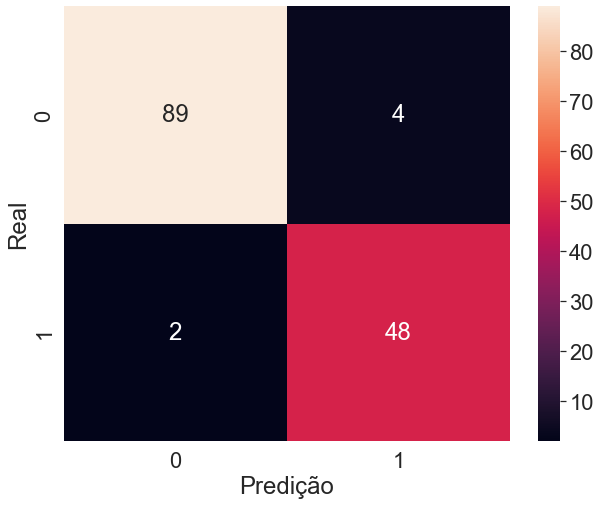

In [77]:
matriz = metrics.confusion_matrix(df_test['svc_4'], ytest)
plt.figure(figsize =(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz, annot = True, fmt = "d").set(xlabel = "Predição", ylabel="Real")

Somente dos casos em que o tumor real era tipo M e o algoritmo indicou tipo B.

#  Validação Cruzada 

================ svc_1 =====================
Accuracy médio: 97.5
Intervalo padrão [94.7 , 100.0]
================ svc_2 =====================
Accuracy médio: 98.1
Intervalo padrão [96.4 , 100.0]
================ svc_3 =====================
Accuracy médio: 82.4
Intervalo padrão [75.0 , 89.5]
================ svc_4 =====================
Accuracy médio: 94.7
Intervalo padrão [91.2 , 98.2]
================ svc_5 =====================
Accuracy médio: 95.4
Intervalo padrão [93.0 , 100.0]


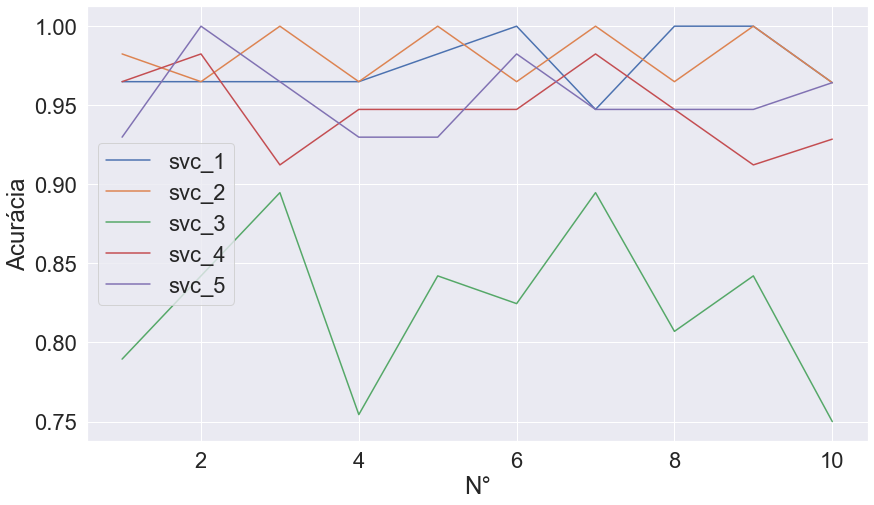

In [78]:
from sklearn import preprocessing, model_selection, metrics
import random
from sklearn import svm
model_map = {
        'svc_1': svm.SVC(),
        'svc_2': svm.SVC(kernel='linear', C=0.1, probability=True),
        'svc_3': svm.SVC(kernel='poly', C=0.1, probability=True),
        'svc_4': svm.SVC(kernel='rbf', C=0.1, probability=True),
        'svc_5': svm.SVC(kernel='sigmoid', C=0.1, probability=True),
        #'svc_6': svm.SVC(kernel='precomputed', C=0.1, probability=True),
}
cv = StratifiedKFold(n_splits = 10, shuffle = True)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("N°")
plt.ylabel("Acurácia")

Y = target
X = dataSet5
resultsdf = pd.DataFrame([1,2,3,4,5,6,7,8,9,10], columns = ['ID'])

df_train = xtrain.copy()
df_test = xtest.copy()

for modelname, model in model_map.items():
    
    model_map[modelname] = model
    results=cross_validate(model, X, Y, cv=cv, return_train_score=False)
    print_results_cross_validation(results, modelname)
    resultsdf = pd.concat([resultsdf, pd.DataFrame(results['test_score'],columns = [modelname])], axis = 1)
    plt.plot(resultsdf['ID'], resultsdf [modelname], label = modelname)
plt.legend() 
plt.show()

O kernel='linear', C=0.1, probability=True e o padrão tiveram o melhor resultado com acurácias de 97,50 % (média). E intervalo de 95,2% - 99,9% para o SVC_1 (padrão) e SVC_2 (kernel linear) 99,9 e 100%.

# 9. Conclusão

 Na comparação entre os modelos dos modelos com os dados utilizados com o treinamento com a amostragem e com os resultados com validação cruzada.


# Regressão Logistica

Validação Cruzada: Melhor Ambas as váriações

================ default ===================== 

Accuracy médio: 97.9 Intervalo padrão [96.4 , 99.4]

================ log_l1 ===================== 

Accuracy médio: 97.9 Intervalo padrão [96.6 , 99.2]

================ log_l2 ===================== 

Accuracy médio: 97.5 Intervalo padrão [96.4 , 98.7]

================ log_el ===================== 

Accuracy médio: 97.5 Intervalo padrão [95.0 , 100.0]
    
Ambos tiveram bons resultados e muito semelhantes tambem, se for feita a validação cruzada tiversas vezes, um
vai aparecer melhor que o outro.

Amostragem: log_el, ficou um pouco acima

Precisão: B: 97% e M: 98%
Recall: B: 99% e M: 94%
F1-Score: B: 98% e M 96%

# Arvoré de Decisão

Validação Cruzada: Melhor, profundidade 4

================ Profundidade: 4 =====================

Accuracy médio: 95.79
Intervalo padrão [93.54 , 98.03]

Acurácia de média de 96% e intervalo entre 94% e 98%, levemente superior aos resultados da regressão logistica

Amostragem: Melhor, profundidade 4 

Precisão B: 99% e M: 94%
Recall B: 97% e M: 98%
F1 Score B: 98% M 96%

# Support Vector Machine

================ SVC Padrão =========================

Accuracy médio: 97,5
Intervalo padrão 95,2% - 99,9

Ficou com 94% de acurácia média e intervalo de 91% a 97%, levemente atras do regressão logistica

Amostragem, SVC Padrão

Precisão B: 98% e M: 100%
Recall B: 100% e M: 96%
F1-Score: B 99% e M: 98% 

Na comparação direta entre os modelos utilizando a validação cruzada. 

================ svc_1 =====================
Accuracy médio: 97.5
Intervalo padrão [94.7 , 100.0]
================ svc_2 =====================
Accuracy médio: 97.5
Intervalo padrão [93.0 , 100.0]
================ default =====================
Accuracy médio: 97.9
Intervalo padrão [94.7 , 100.0]
================ log_l1 =====================
Accuracy médio: 98.1
Intervalo padrão [94.7 , 100.0]
================ log_l2 =====================
Accuracy médio: 98.1
Intervalo padrão [94.7 , 100.0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

================ log_el =====================
Accuracy médio: 98.2
Intervalo padrão [94.7 , 100.0]
================ Arvore4 =====================
Accuracy médio: 94.2
Intervalo padrão [89.5 , 100.0]
================ Arvore5 =====================
Accuracy médio: 94.4
Intervalo padrão [89.5 , 100.0]
================ Arvore3 =====================
Accuracy médio: 95.1
Intervalo padrão [89.5 , 100.0]


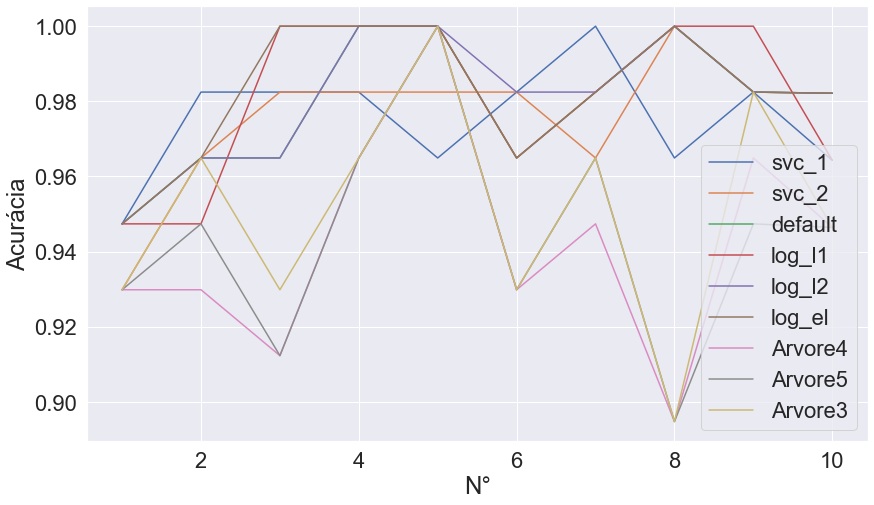

In [79]:
from sklearn import preprocessing, model_selection, metrics
import random
from sklearn import svm
model_map = {
        'svc_1': svm.SVC(),
        'svc_2': svm.SVC(kernel='linear', C=0.1, probability=True),
        'default': lm.LogisticRegression(),
        'log_l1': lm.LogisticRegression(penalty='l1', solver='liblinear', C=1.0),
        'log_l2': lm.LogisticRegression(penalty='l2', solver='liblinear', C=1.0),
        'log_el': lm.LogisticRegression(penalty='elasticnet',l1_ratio= 0.4, solver='saga', C=1.0),
        'Arvore4': tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4),
        'Arvore5': tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5),
        'Arvore3': tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)
}
cv = StratifiedKFold(n_splits = 10, shuffle = True)
cvfold = model_selection.StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("N°")
plt.ylabel("Acurácia")

Y = target
X = dataSet5
resultsdf = pd.DataFrame([1,2,3,4,5,6,7,8,9,10], columns = ['ID'])

df_train = xtrain.copy()
df_test = xtest.copy()

for modelname, model in model_map.items():
    
    model_map[modelname] = model
    results=cross_validate(model, X, Y, cv=cvfold, return_train_score=False)
    print_results_cross_validation(results, modelname)
    resultsdf = pd.concat([resultsdf, pd.DataFrame(results['test_score'],columns = [modelname])], axis = 1)
    plt.plot(resultsdf['ID'], resultsdf [modelname], label = modelname)
plt.legend() 
plt.show()

O modelo que demonstrou melhor performance entre os que foram treinados acima no teste com amostragem utilizando um seed para não haver resultados diferentes entre das execuções foi o Support Vector Machine (padrão). Um ponto importante, é que no teste por amostragem , a arvore de decisão obteve uma sensibilidade melhor ao tipo M, importante para não ter o risco de prevar um caso menos grave. Esse é o caso mais critico, que seria um diagnostico errado prejudicando o paciente de forma a prever uma gravidade menor do que a real. É possível então tentar otimizar a modelagem afim de tentar eliminar para conseguir uma sensibilidade de 100% para o tipo para o tipo M.

Na validação cruzada comparando todos os modelos apresentados acima, com as variações testadas com melhor resultado. Obtiveram o
maior sucesso os de regressão logistica. Então Accuracy médio: 98.2 Intervalo padrão [96.5 , 100.0]. Então, ambos os algoritmos
testados servem para predição deste problema, e ambos podem ser otimizados para obter resultados melhores. Porém na validação
cruzada, a regressão logistica obteve melhores resultados, então para ser implantado para utilização, podendo escolher somente um,
seria mais indicadoo regressão logistica log_el.

================ svc_1 =====================
Accuracy médio: 97.5
Intervalo padrão [94.7 , 100.0]
================ svc_2 =====================
Accuracy médio: 97.5
Intervalo padrão [93.0 , 100.0]
================ default =====================
Accuracy médio: 97.9
Intervalo padrão [94.7 , 100.0]
================ log_l1 =====================
Accuracy médio: 98.2
Intervalo padrão [94.7 , 100.0]
================ log_l2 =====================
Accuracy médio: 98.1
Intervalo padrão [94.7 , 100.0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

================ log_el =====================
Accuracy médio: 98.2
Intervalo padrão [94.7 , 100.0]
================ Arvore4 =====================
Accuracy médio: 94.4
Intervalo padrão [89.5 , 100.0]
================ Arvore5 =====================
Accuracy médio: 93.8
Intervalo padrão [87.7 , 100.0]
================ Arvore3 =====================
Accuracy médio: 94.9
Intervalo padrão [87.7 , 100.0]


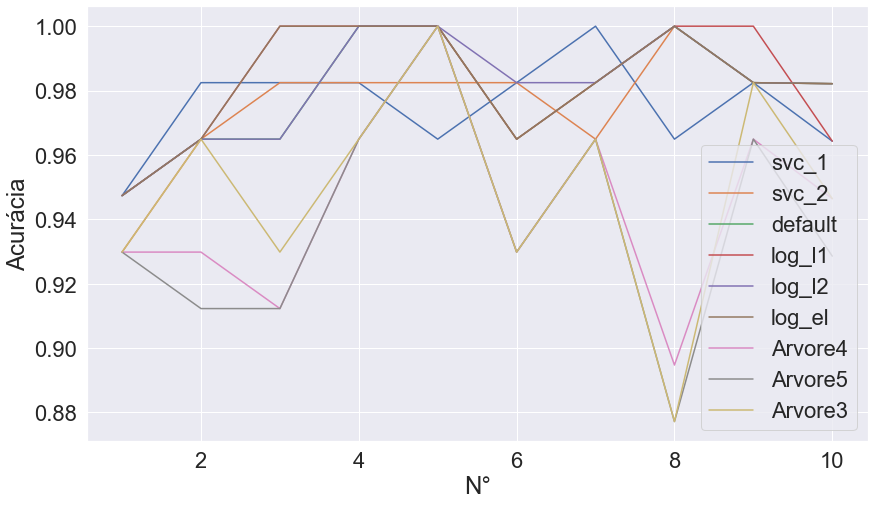

In [80]:
from sklearn import preprocessing, model_selection, metrics
import random
from sklearn import svm
model_map = {
        'svc_1': svm.SVC(),
        'svc_2': svm.SVC(kernel='linear', C=0.1, probability=True),
        'default': lm.LogisticRegression(),
        'log_l1': lm.LogisticRegression(penalty='l1', solver='liblinear', C=1.0),
        'log_l2': lm.LogisticRegression(penalty='l2', solver='liblinear', C=1.0),
        'log_el': lm.LogisticRegression(penalty='elasticnet',l1_ratio= 0.4, solver='saga', C=1.0),
        'Arvore4': tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4),
        'Arvore5': tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5),
        'Arvore3': tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)
}
cv = StratifiedKFold(n_splits = 10, shuffle = True)
cvfold = model_selection.StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("N°")
plt.ylabel("Acurácia")

Y = target
X = dataSet5
resultsdf = pd.DataFrame([1,2,3,4,5,6,7,8,9,10], columns = ['ID'])

df_train = xtrain.copy()
df_test = xtest.copy()

for modelname, model in model_map.items():
    
    model_map[modelname] = model
    results=cross_validate(model, X, Y, cv=cvfold, return_train_score=False)
    print_results_cross_validation(results, modelname)
    resultsdf = pd.concat([resultsdf, pd.DataFrame(results['test_score'],columns = [modelname])], axis = 1)
    plt.plot(resultsdf['ID'], resultsdf [modelname], label = modelname)
plt.legend() 
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

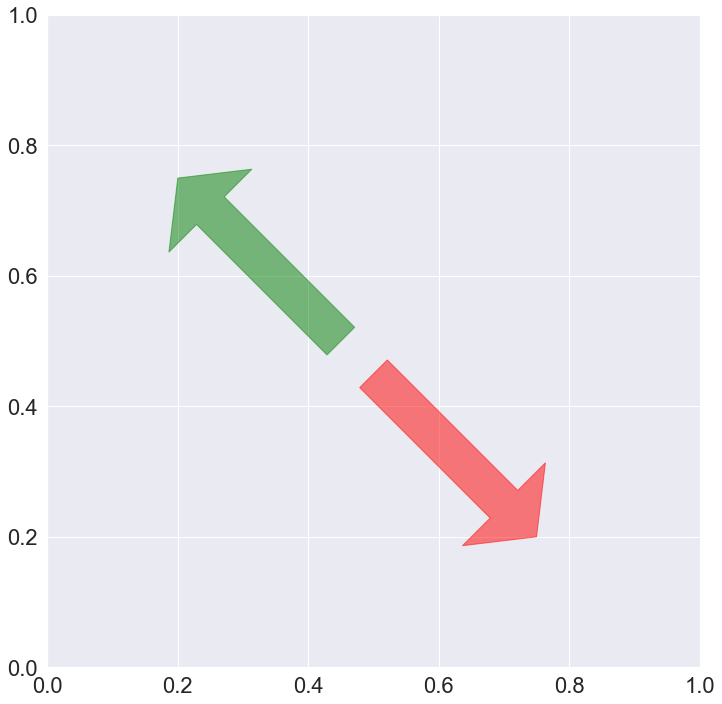

In [81]:
import matplotlib.patches as patches
from sklearn.metrics import roc_curve,auc

dict = {'diagnosis':{'M':1,'B':0}} 

data= pd.concat ([dataSet [['diagnosis']], dataSet5])

data.replace(dict,inplace = True)  

X = data.loc[:, data.columns != 'diagnosis']
Y = data.loc[:,'diagnosis']


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,Y):
    prediction = model_map['svc_2'].fit(X.iloc[train],Y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(Y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with

X = dataSet5
y = target
X, y = X[y != 'M'], y[y != 'M']
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [ ]:
type(dataSet [['diagnosis']])

In [ ]:
data= pd.concat ([dataSet [['diagnosis']], dataSet5])


In [ ]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [ ]:
fpr, tpr, thr = metrics.roc_curve(clas, prob)

In [ ]:
plt.figure(figsize=(6,4))
for i in Y.target.unique():
    sns.distplot(df_wine[df_wine[wine_target_col] == i].probability,
                 label=wine_label_map[wine_label_map.target == i].target_label,
                 ax = plt.gca())

plt.title('Distribuição de Probabilidade por Classe')
plt.ylabel('Densidade Estimada')
plt.xlabel('Probabilidade Alta Qualidade')
plt.xlim((0,1))
plt.grid()
plt.legend()

In [ ]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, random_state=SEED)
model_wine = lm.LogisticRegression(penalty='l2', solver='liblinear')
model_wine.fit(xtrain, ytrain)      
df_train['decision'] = model_wine.predict(xtrain)
df_test['decision']  = model_wine.predict(xtest)
df_train['probability'] = model_wine.predict_proba(xtrain)[:,1]
df_test['probability']  = model_wine.predict_proba(xtest)[:,1]

In [ ]:
plt.figure(figsize=(6,4))

fpr, tpr, thr = metrics.roc_curve(Y,
                                  df_wine['probability'])
plt.plot(fpr, tpr, '-', lw=2, label='Regressão Logística')

plt.legend(loc='right')
plt.title('Classificador Vinhos de Alta Qualidade')
plt.grid()
plt.xlabel('Taxa de Falso Alarme')
plt.ylabel('Taxa de Detecção')